# PLOT EVI VS YIELD FROM 2001-2018

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio

%matplotlib inline

# RAINFED PLOTS

In [58]:
# NDVI SUM Data
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/duration_seasonalCompositeNDVI_2017_SUM_JFM.gpkg'
points = gpd.read_file(points)
points = points.groupby(['Class','ADM3_EN']).mean().reset_index()
points = points.loc[points['Class']=='Rain-fed Rice']
points = points.loc[points['ADM3_EN'].isin([
'Carles',
'Calinog',
'Estancia',
'Lambunao',
'Cabatuan',
'Duenas',
'Santa Barbara',
#'Bingawan',
'Maasin',
'Badiangan'
])]

# Rename column headings
points = points.rename(columns=dict(zip(list(points.columns[2:20]), list(np.arange(2001, 2019, 1)))))

# Melt dataframe
df = points.melt(id_vars=["Class", "ADM3_EN"], 
        var_name="Date", 
        value_name="Cumulative NDVI").groupby(['Date']).mean().reset_index()
# Convert Date Column
df['Date']= df['Date'].map(str)
df['system:time_start']=[datetime.strptime(x, '%Y') for x in df['Date']]
df['Date']= df['Date'].map(int)

# Actual Data
## CHANGE THESE
startYear = 2001
endYear = 2018 #2017

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
actual = actual[(actual.year <= endYear) & (actual.year >= startYear)].groupby('year').mean().reset_index(drop=False)
actual.head()

merged = pd.merge(actual, df, left_on='year', right_on='Date')
merged = merged.drop(columns=['year','Date']).rename(columns={'value':'Yield'})
#merged

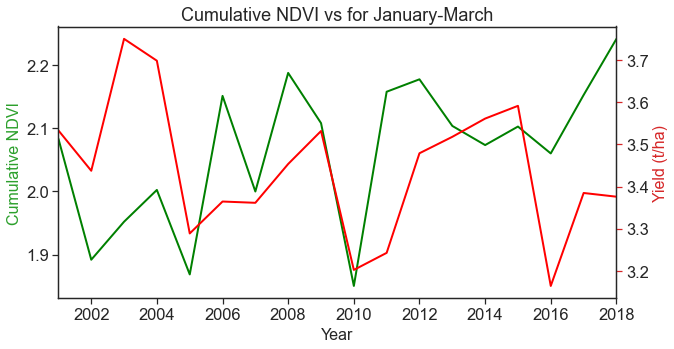

In [59]:
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="ticks")

# multiple line plot
font = {'size': 20}

plt.rc('font', **font)

# Create figure and plot space
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

# Set Axis 1 Parameters
color = 'tab:green'
#ax1.set_title('Annual Yield and EVI', fontsize=25)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Cumulative NDVI', fontsize=16, color=color)
sns.lineplot(x='system:time_start', y='Cumulative NDVI', data = merged, ax = ax1, linewidth=2, linestyle='solid', color='Green')
#ax1.yaxis.set_ticks(np.arange(3.0, 4.3, 0.2))
ax1.tick_params(axis='y')
#ax1.legend(labels=['Yield Wet Season','Yield Dry Season'])
#ax1.get_legend().remove()

# Reduce margins
ax1.margins(x=0)

# Setup 2nd Axis
ax2 = ax1.twinx()

# Set Axis 2 Parameters
color = 'tab:red'
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Yield (t/ha)', fontsize=16, color=color)
sns.lineplot(x='system:time_start', y='Yield', data = merged, ax = ax2, linewidth=2, linestyle='solid', color='Red')
#ax2.legend(labels=['EVI Wet Season','EVI Dry Season'])
#ax2.yaxis.set_ticks(np.arange(0.45, 0.75, 0.05))  

# added these three lines
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, ['Yield Wet Season','Yield Dry Season',var +' Wet Season',var + ' Dry Season'], bbox_to_anchor=(1.15, 1), loc='upper left')#, prop={'size': 14})

ax2.tick_params(axis='y', color=color)
#ax2.get_legend().remove()

plt.title('Cumulative NDVI vs for January-March')
#plt.savefig(var + ecosystem +'.png', dpi=300)
plt.show()

# IRRIGATED PLOTS

In [60]:
# NDVI SUM Data
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/duration_seasonalCompositeNDVI_2017_SUM_JAS.gpkg'
points = gpd.read_file(points)
points = points.groupby(['Class','ADM3_EN']).mean().reset_index()
points = points.loc[points['Class']=='Irrigated Rice']

# Rename column headings
points = points.rename(columns=dict(zip(list(points.columns[2:20]), list(np.arange(2001, 2019, 1)))))

# Melt dataframe
df = points.melt(id_vars=["Class", "ADM3_EN"], 
        var_name="Date", 
        value_name="Cumulative NDVI").groupby(['Date']).mean().reset_index()
# Convert Date Column
df['Date']= df['Date'].map(str)
df['system:time_start']=[datetime.strptime(x, '%Y') for x in df['Date']]
df['Date']= df['Date'].map(int)

# Actual Data
## CHANGE THESE
startYear = 2001
endYear = 2018 #2017

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'irri')].reset_index(drop=True)
actual = actual[(actual.year <= endYear) & (actual.year >= startYear)].groupby('year').mean().reset_index(drop=False)
actual.head()

merged = pd.merge(actual, df, left_on='year', right_on='Date')
merged = merged.drop(columns=['year','Date']).rename(columns={'value':'Yield'})
#merged

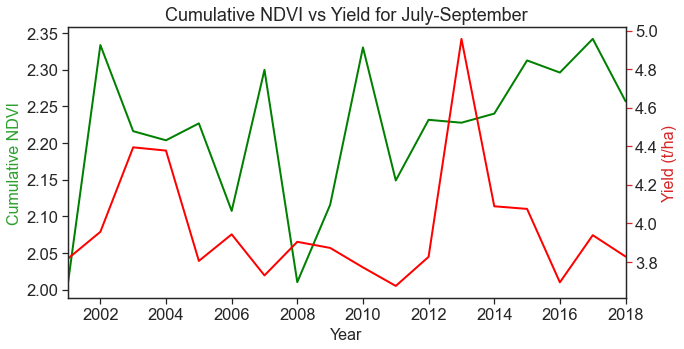

In [61]:
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="ticks")

# multiple line plot
font = {'size': 20}

plt.rc('font', **font)

# Create figure and plot space
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

# Set Axis 1 Parameters
color = 'tab:green'
#ax1.set_title('Annual Yield and EVI', fontsize=25)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Cumulative NDVI', fontsize=16, color=color)
sns.lineplot(x='system:time_start', y='Cumulative NDVI', data = merged, ax = ax1, linewidth=2, linestyle='solid', color='Green')
#ax1.yaxis.set_ticks(np.arange(3.0, 4.3, 0.2))
ax1.tick_params(axis='y')
#ax1.legend(labels=['Yield Wet Season','Yield Dry Season'])
#ax1.get_legend().remove()

# Reduce margins
ax1.margins(x=0)

# Setup 2nd Axis
ax2 = ax1.twinx()

# Set Axis 2 Parameters
color = 'tab:red'
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Yield (t/ha)', fontsize=16, color=color)
sns.lineplot(x='system:time_start', y='Yield', data = merged, ax = ax2, linewidth=2, linestyle='solid', color='Red')
#ax2.legend(labels=['EVI Wet Season','EVI Dry Season'])
#ax2.yaxis.set_ticks(np.arange(0.45, 0.75, 0.05))  

# added these three lines
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, ['Yield Wet Season','Yield Dry Season',var +' Wet Season',var + ' Dry Season'], bbox_to_anchor=(1.15, 1), loc='upper left')#, prop={'size': 14})

ax2.tick_params(axis='y', color=color)
#ax2.get_legend().remove()

plt.title('Cumulative NDVI vs Yield for July-September')
#plt.savefig(var + ecosystem +'.png', dpi=300)
plt.show()